<h2>Repayment of Loan:</h2>
<p>The aim of this Data Science Project is to classify whether a customer whose loan has been sanctioned previously would be able to return the loan completely within the stipulated time. Hence, my focus is to make this process automated where based upon the details of the customer, the model would make prediction of whether the person would be able to repay the loan.</p>

In [1]:
# Importing numpy, pandas, matplotlib and seaborn :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for handling the warnings:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h3>Example Computations:</h3>

In [2]:
orig_data = pd.read_csv('bankruptcy_data.csv')
orig_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
index = 634
data_to_test = dict(orig_data.loc[index])
for key in data_to_test.keys():
    
    # for credit.policy:
    if key == "credit.policy":
        if (data_to_test[key] == 1):
            data_to_test[key] = "Yes"
        else:
            data_to_test[key] = "No"
    else:
        pass
    
data_to_test["purpose"] = "Debt Consolidation"
data_to_test["annual.inc"] = np.exp(data_to_test["log.annual.inc"]+1)
del data_to_test["log.annual.inc"]
data_to_test["int.rate"] = data_to_test["int.rate"]*100

print(data_to_test)

{'credit.policy': 'Yes', 'purpose': 'Debt Consolidation', 'int.rate': 10.39, 'installment': 194.71, 'dti': 7.5, 'fico': 692, 'days.with.cr.line': 1920.0, 'revol.bal': 4524, 'revol.util': 94.2, 'inq.last.6mths': 1, 'delinq.2yrs': 0, 'pub.rec': 0, 'not.fully.paid': 0, 'annual.inc': 45667.134700240094}


<h2>Investigating Missing Values:</h2>

In [4]:
# Number of missing values in each of the feature:
orig_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<li>The data seems to be cleaned i.e. it does not have even a single missing value. Thus, it becomes quite easy for us as far as dealing with the missing values is concerned.</li>

In [5]:
# columns name of orig_data:
feats_orig = list(orig_data.columns)
cat_feats_orig = []
num_feats_orig = []

# distincting features:
for feature in feats_orig:
    if orig_data[feature].nunique() > 10:
        num_feats_orig.append(feature)
    else:
        cat_feats_orig.append(feature)

print('Categorical Feature: ', cat_feats_orig, end='\n\n')
print('Numerical Features: ', num_feats_orig)

Categorical Feature:  ['credit.policy', 'purpose', 'pub.rec', 'not.fully.paid']

Numerical Features:  ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs']


In [6]:
# Let's keep 'pub.rec' in numerical way (it will be considered more or less as Label Encoding) and 
# I won't be further encoding it in One-Hot Encoding.
cat_feats_orig.remove('pub.rec')
num_feats_orig.append('pub.rec')

print('Categorical Feature: ', cat_feats_orig, end='\n\n')
print('Numerical Features: ', num_feats_orig)

Categorical Feature:  ['credit.policy', 'purpose', 'not.fully.paid']

Numerical Features:  ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']


<h2>Distribution of Numerical Features and Univariate Outliers Investigation:</h2>

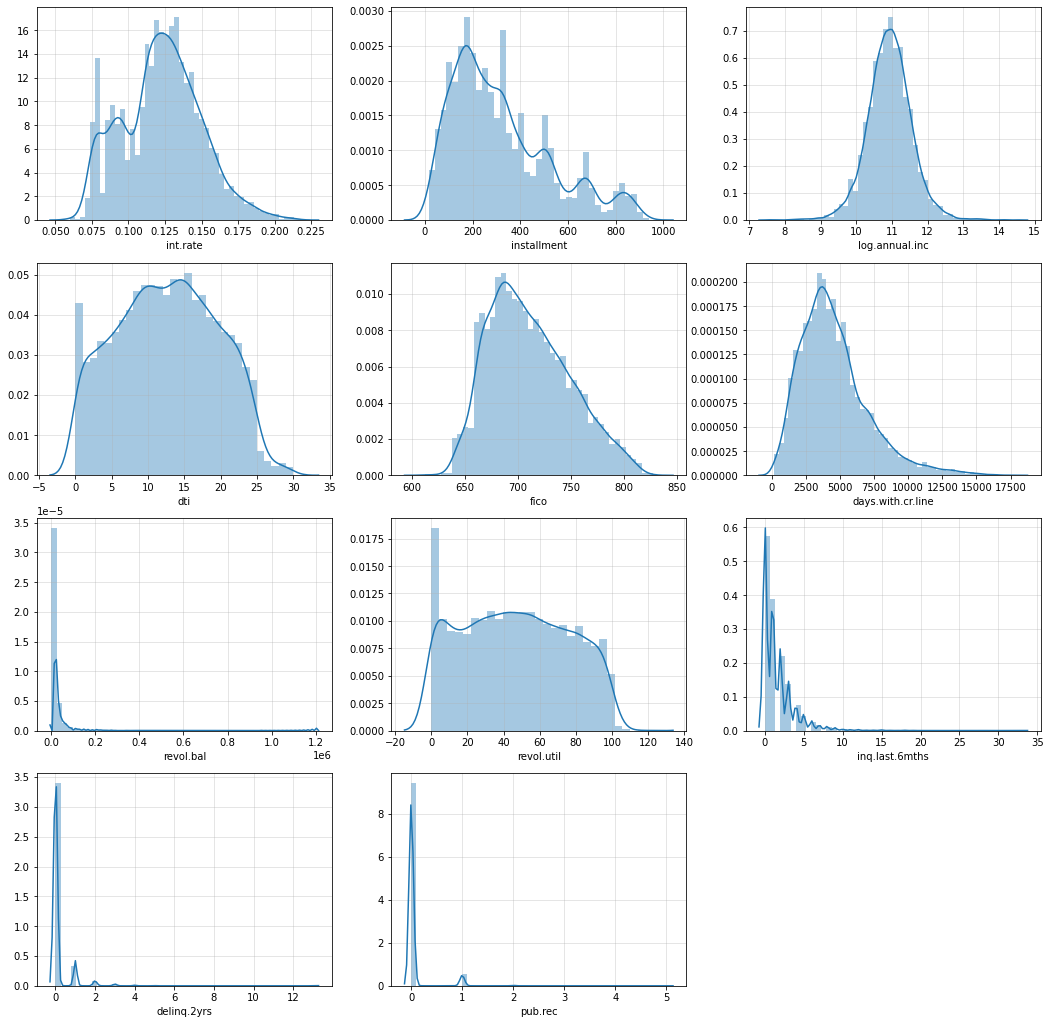

In [7]:
plt.figure(figsize=(18, 18))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(4, 3, k);
    sns.distplot(orig_data[num_feat])
    plt.grid(True, alpha=0.4)
    k+=1

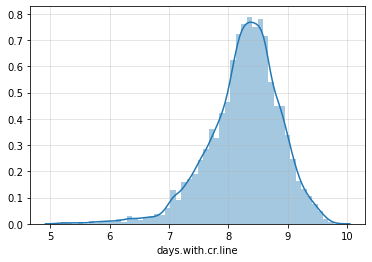

In [8]:
# testing log_days_with_cr_line:
sns.distplot(np.log(orig_data['days.with.cr.line']))
plt.grid(True, alpha=0.4)

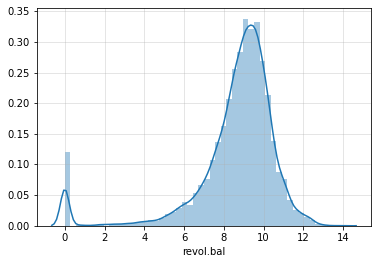

In [9]:
# testing log_revol_balance:
sns.distplot(np.log(orig_data['revol.bal']+1))
plt.grid(True, alpha=0.4)

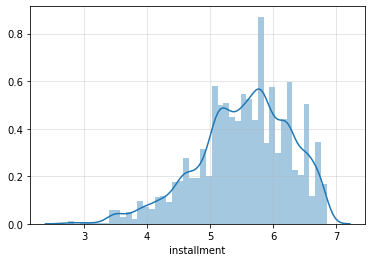

In [10]:
# testing log_installment:
sns.distplot(np.log(orig_data['installment']))
plt.grid(True, alpha=0.4)

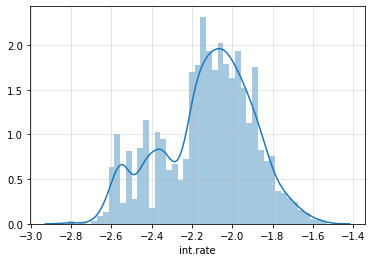

In [11]:
# testing log_int_rate:
sns.distplot(np.log(orig_data['int.rate']))
plt.grid(True, alpha=0.4)

In [12]:
# num feats whose logarithm has to be converted:
log_feats = ['days.with.cr.line', 'revol.bal', 'installment', 'int.rate']

# also remember that there are certain features which are discrete numerical features and their Outliers won't be computed:

In [13]:
# creating copy of the data:
orig_data_copy = orig_data.copy()
orig_data_copy.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
# adding the log-feats in data:
for cont_num_feat in log_feats:
    orig_data_copy['log.'+cont_num_feat] = np.log(orig_data_copy[cont_num_feat]+1)
print('Total Features:', orig_data_copy.columns)

Total Features: Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'log.days.with.cr.line', 'log.revol.bal', 'log.installment',
       'log.int.rate'],
      dtype='object')


<strong>Remember while dealing with the above features values in the backend i.e. whose logarithm has been considered, we have added 1 to that value and then taken its logarithm.</strong>

<h2>Outliers Investigation:</h2>
<p> Outliers would only be computed for Continous Numerical features as mentioned below. We cannot derive insights of a point being an outlier in Discrete Numerical Feature based upon the z-score technique which we would be using for dealing with the outliers. Outliers would be dealt in <code>orig_data_copy</code>. Following mentioned features are the ones for which univariate Outlier Techniques would be applied.
<ol>
    <li><strong>log.revol.bal</li>
    <li>log.days.with.cr.line</li>
    <li>log,installment</li>
    <li>log.int.rate</li>
    <li>log.annual.inc</li>
    <li>dti</li>
    <li>fico</li>
    <li>revol.util</li>
    </ol>
</p>
</p>

In [15]:
# function which help in better understanding of outliers:
# Outliers are computed based upon the IQR value:
def outliers_iqr(data, num_feature, max_height):
    q1 = np.percentile(data[num_feature], 25)
    q3 = np.percentile(data[num_feature], 75)
    iqr = q1-q3
    result = []
    
    # these are specific to each numerical feature:
    upper_thresh = q3 + (iqr*2.2)
    lower_thresh = q1 - (iqr*2.2)
    left_tail_outliers = len(data[data[num_feature] < lower_thresh])
    right_tail_outliers = len(data[data[num_feature] > upper_thresh])
    
    properties = ['Percentage of Outliers Towards left Tail', 'Percentage of Outliers Towards Right Tail', 'Upper Threshold', 'Lower Threshold']
    values = [left_tail_outliers/len(data)*100, right_tail_outliers/len(data)*100, upper_thresh, lower_thresh]
    for prop, corresponding_val in zip(properties, values):
        result.append((prop, corresponding_val))
    
    result_df = pd.DataFrame(result, columns=['Property', 'Corresponding Value'])
    print('Numerical Inspection of ' + num_feature + ':\n')
    print(result_df)
    print('\n Graphical Interpretation of ', num_feature + ':\n')
    graphical_inter_num_feature(data, num_feature, upper_thresh, lower_thresh, max_height)
    return True

# graphical interpretation of numerical features:
def graphical_inter_num_feature(data, num_feature, upper_thresh, lower_thresh, max_height):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # probability distribution of numerical feature:
    sns.distplot(data[num_feature], ax=ax1, color='darkred')
    ax1.vlines(upper_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.vlines(lower_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.fill_betweenx(y= np.linspace(0, max_height, len(data[num_feature])), x1=lower_thresh, x2=upper_thresh, color='green', alpha=0.3)
    ax1.set_title('PDF of '+num_feature)
    ax1.grid(True, alpha=0.4)
    
    # boxplots to investigate outliers:
    sns.boxplot(y=num_feature, data=data, ax=ax2)
    ax2.set_title('Boxplot of '+num_feature)
    ax2.grid(True, alpha=0.4)

In [16]:
# outliers based upon the z-score of each feature:
# Outliers are computed based upon the Z-Score Value:
def outliers_zscore(data, num_feature, max_height=0.7):
    mean = np.mean(data[num_feature])
    std_dev = np.std(data[num_feature])
    data['z_score'+num_feature] = (data[num_feature]-mean)/std_dev
    
    # computing those indexes whose z_score > 3:
    right_outliers_data = data[data['z_score'+num_feature] > 3]
    left_outliers_data = data[data['z_score'+num_feature] < -3]
    final_outliers_data = pd.concat([right_outliers_data, left_outliers_data])
    print('Proportion of Outlier Data: ', (len(final_outliers_data)/len(data))*100, '%')
    index_pos = list(final_outliers_data.index)
    
    # threshold value i.e. value at 3rd standard deviation:
    left_stddev_3 = -3*std_dev + mean
    right_stddev_3 = 3*std_dev + mean
    graphical_inter_num_feature(data, num_feature, right_stddev_3, left_stddev_3, max_height)
    return (index_pos, left_stddev_3, right_stddev_3)

# Winsorizing: Replacing the outliers with the threshold value of 3rd Standard Deviation:
def winsorizing_outliers_zscore(data, num_feature, max_height):
    (index_outliers, left_stddev_3, right_stddev_3) = outliers_zscore(data, num_feature, max_height)
    data[num_feature] = np.where(data['z_score'+num_feature] > 3, right_stddev_3, data[num_feature])
    data[num_feature] = np.where(data['z_score'+num_feature] < -3, left_stddev_3, data[num_feature])
    print('Count of Outliers Towards Right Tail -->', len(data[data[num_feature]>right_stddev_3]))
    print('Count of Outliers Towards Left Tail-->', len(data[data[num_feature]<left_stddev_3]))
    print('After Dealing with the Outliers:')
    graphical_inter_num_feature(data, num_feature, right_stddev_3, left_stddev_3, max_height)
    return data

<h3>Outliers of <code>log.revol.bal</code>:</h3>

In [17]:
# another copy of orig_data_copy:
orig_data_copy_new = orig_data_copy.copy()

Numerical Inspection of log.revol.bal:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            98.851535
1  Percentage of Outliers Towards Right Tail            92.493214
2                            Upper Threshold             5.973391
3                            Lower Threshold            11.905706

 Graphical Interpretation of  log.revol.bal:



True

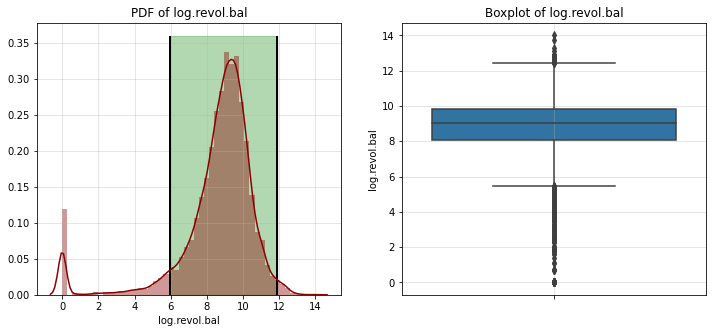

In [18]:
# Outliers depicted on the basis of IQR:
outliers_iqr(orig_data_copy_new, 'log.revol.bal', 0.36)

Proportion of Outlier Data:  3.560242221758196 %


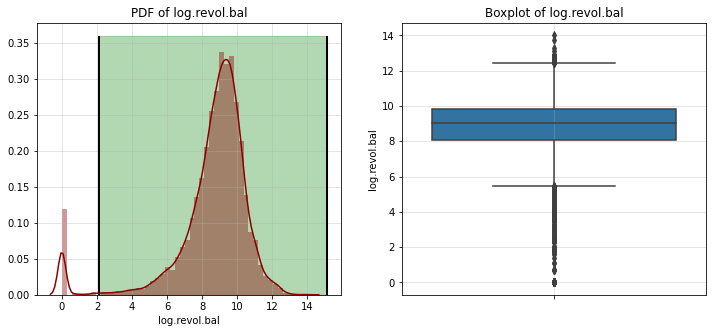

In [19]:
# Outliers depicted on the basis of Z-Score since the distribution seems to be that of Gaussian Distribution:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'log.revol.bal', 0.36)

<li>Insight: <strong>As we can observe from the above exploration of <code>log.revol.bal</code> that we have a lot of customers who have this feature's value equal to 0 and there is no chance that we winsorize this feature, hence, we might go ahead with letting it just the way it is.</strong></li>

<h3>Outliers of <code>log.days.with.cr.line</code>:</h3>

Numerical Inspection of log.days.with.cr.line:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            99.342243
1  Percentage of Outliers Towards Right Tail            96.043015
2                            Upper Threshold             7.094288
3                            Lower Threshold             9.504204

 Graphical Interpretation of  log.days.with.cr.line:



True

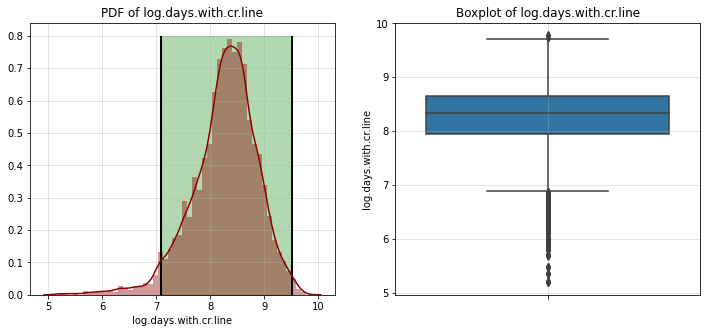

In [20]:
# Outliers depicted on the basis of IQR:
outliers_iqr(orig_data_copy_new, 'log.days.with.cr.line', 0.8)

Proportion of Outlier Data:  1.2111087909793277 %


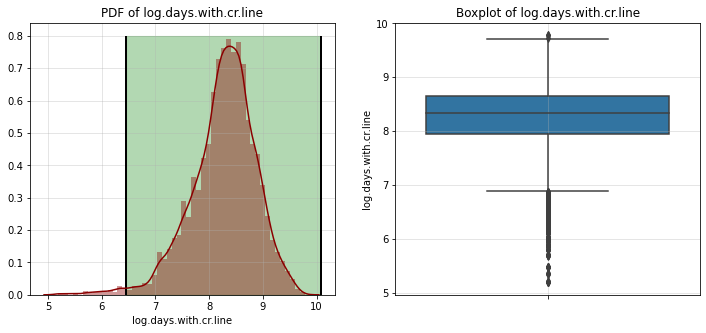

In [21]:
# Outliers depicted on the basis of Z-Score since the distribution seems to be that of Gaussian Distribution:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'log.days.with.cr.line', 0.8)

Proportion of Outlier Data:  1.2111087909793277 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


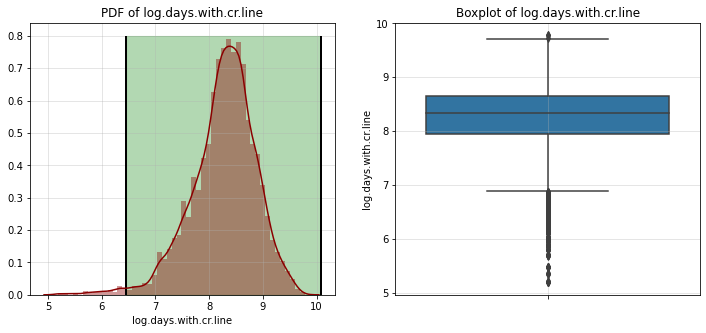

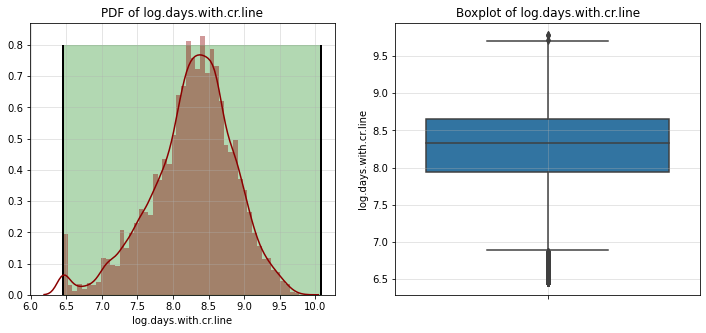

In [22]:
# dealing with the outliers based on z-score:
orig_data_copy_new = winsorizing_outliers_zscore(orig_data_copy_new, 'log.days.with.cr.line', 0.8)

<h3>Outliers of <code>log.installment</code>:</h3>

Numerical Inspection of log.installment:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail           100.000000
1  Percentage of Outliers Towards Right Tail            96.972228
2                            Upper Threshold             3.943015
3                            Lower Threshold             7.234033

 Graphical Interpretation of  log.installment:



True

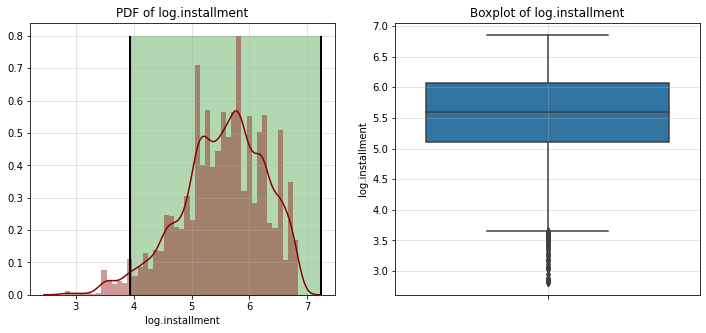

In [23]:
# Outliers depicted on the basis of IQR:
outliers_iqr(orig_data_copy_new, 'log.installment', 0.8)

Proportion of Outlier Data:  0.27145541866778033 %


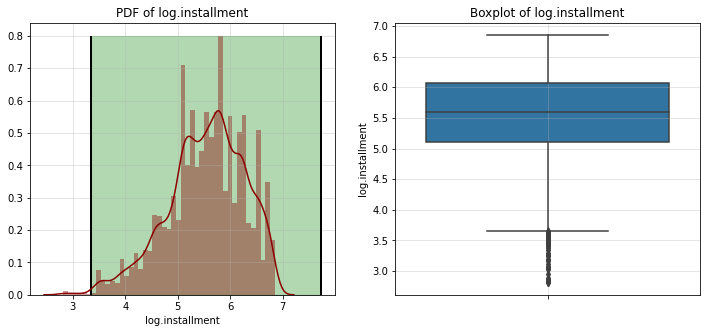

In [24]:
# Outliers depicted on the basis of Z-Score since the distribution seems to be that of Gaussian Distribution:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'log.installment', 0.8)

Proportion of Outlier Data:  0.27145541866778033 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


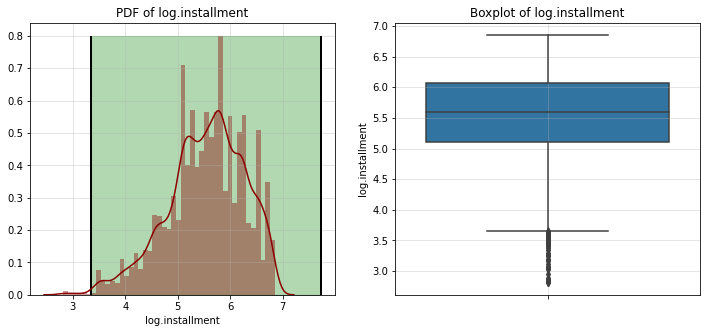

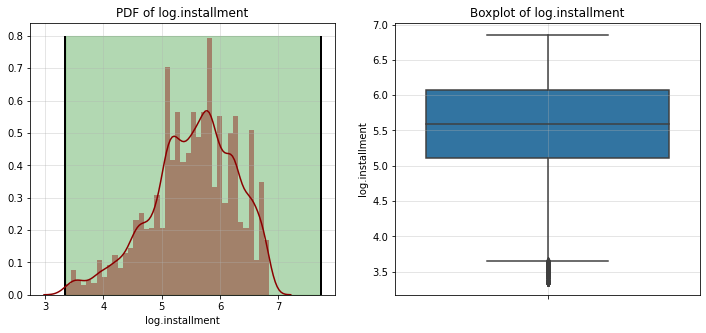

In [25]:
orig_data_copy_new = winsorizing_outliers_zscore(orig_data_copy_new, 'log.installment', 0.8)

<h3>Outliers of <code>log.int.rate</code>:</h3>

Numerical Inspection of log.int.rate:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            98.830654
1  Percentage of Outliers Towards Right Tail            99.916475
2                            Upper Threshold             0.059498
3                            Lower Threshold             0.170993

 Graphical Interpretation of  log.int.rate:



True

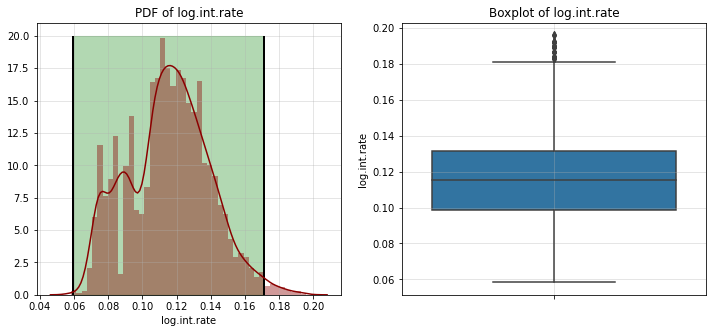

In [26]:
# Outliers based upon IQR:
outliers_iqr(orig_data_copy_new, 'log.int.rate', 20)

Proportion of Outlier Data:  0.1774900814366256 %


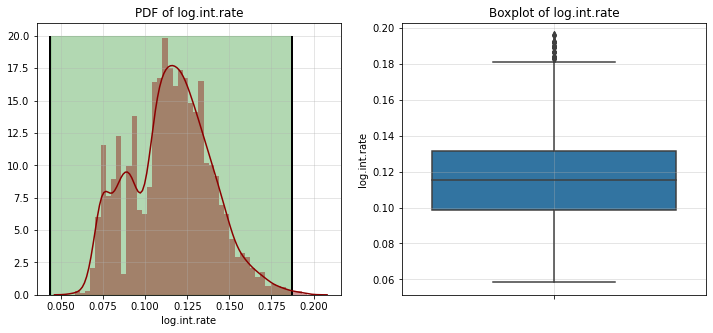

In [27]:
# Outliers based upon zscore:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'log.int.rate', 20)

Proportion of Outlier Data:  0.1774900814366256 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


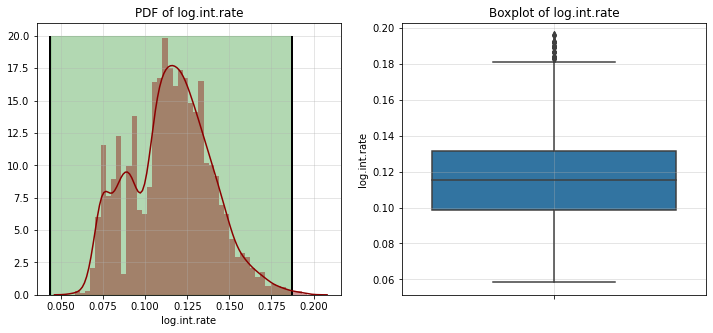

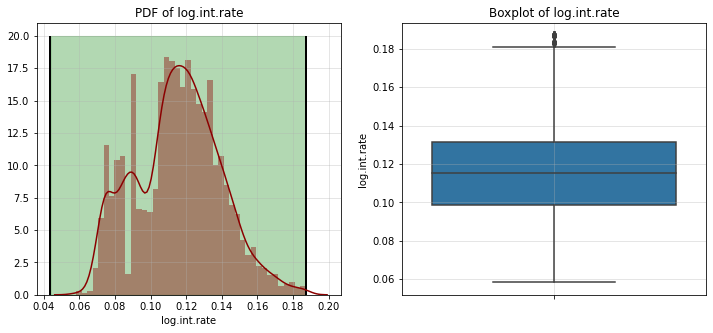

In [28]:
# Dealing with the extreme outlier data points by winsorizing:
orig_data_copy_new = winsorizing_outliers_zscore(orig_data_copy_new, 'log.int.rate', 20)

<h3>Outliers of <code>log.annual.inc</code>:</h3>

Numerical Inspection of log.annual.inc:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            97.431614
1  Percentage of Outliers Towards Right Tail            97.661307
2                            Upper Threshold             9.678958
3                            Lower Threshold            12.170748

 Graphical Interpretation of  log.annual.inc:



True

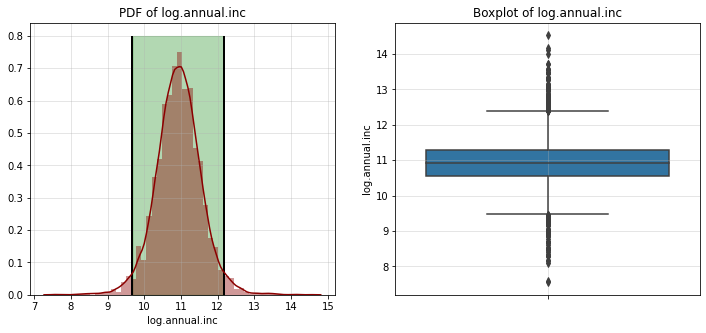

In [29]:
# Outliers described by IQR:
outliers_iqr(orig_data_copy_new, 'log.annual.inc', 0.8)

Proportion of Outlier Data:  0.897891000208812 %


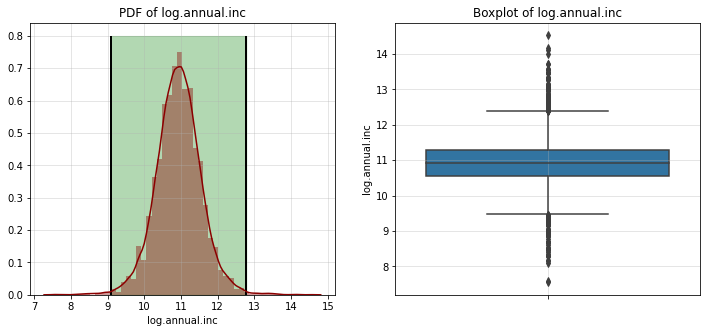

In [30]:
# Outliers described by zscore:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'log.annual.inc', 0.8)

Proportion of Outlier Data:  0.897891000208812 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


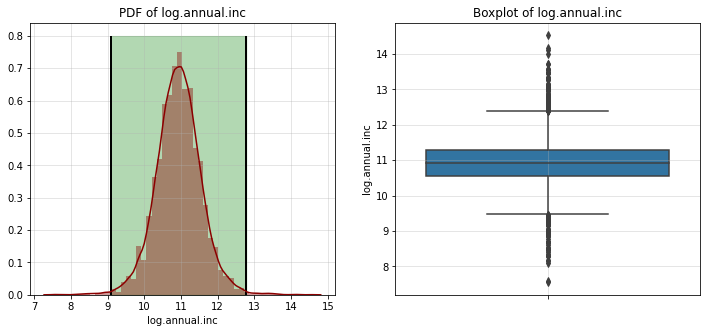

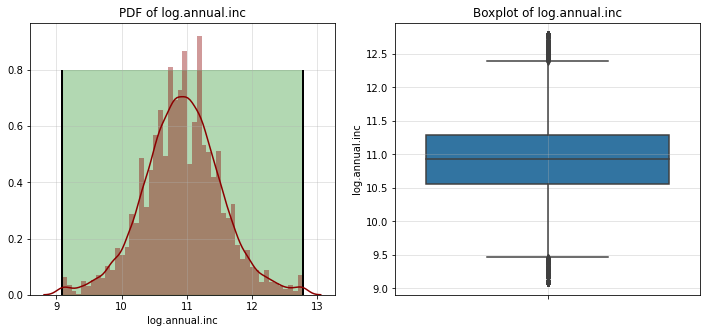

In [31]:
# dealing with the outliers:
orig_data_copy_new = winsorizing_outliers_zscore(orig_data_copy_new, 'log.annual.inc', 0.8)

<h3>Outliers of <code>dti</code>:</h3>

Numerical Inspection of dti:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail             100.0000
1  Percentage of Outliers Towards Right Tail             100.0000
2                            Upper Threshold              -5.6725
3                            Lower Threshold              30.8350

 Graphical Interpretation of  dti:



True

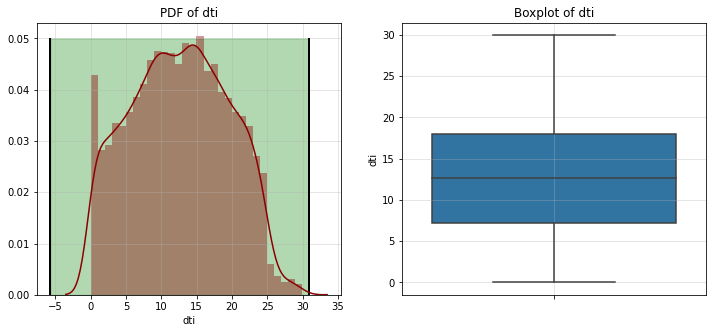

In [32]:
# Outliers described by IQR:
outliers_iqr(orig_data_copy_new, 'dti', 0.05)

Proportion of Outlier Data:  0.0 %


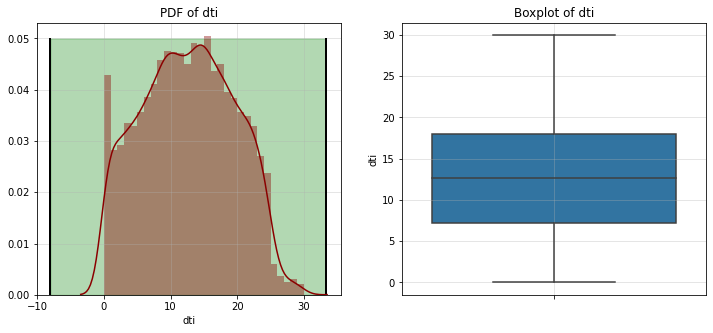

In [33]:
# Outliers described by Zscore:
index_outliers, left_stddev, right_stddev = outliers_zscore(orig_data_copy_new, 'dti', 0.05)

<li>Insight: <strong>There exists no outliers in <code>dti</code> as can be viewed from iqr and zscore.</strong></li>

<h3>Outliers of <code>fico</code>:</h3>

Numerical Inspection of fico:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            99.060347
1  Percentage of Outliers Towards Right Tail            99.979119
2                            Upper Threshold           616.000000
3                            Lower Threshold           803.000000

 Graphical Interpretation of  fico:



True

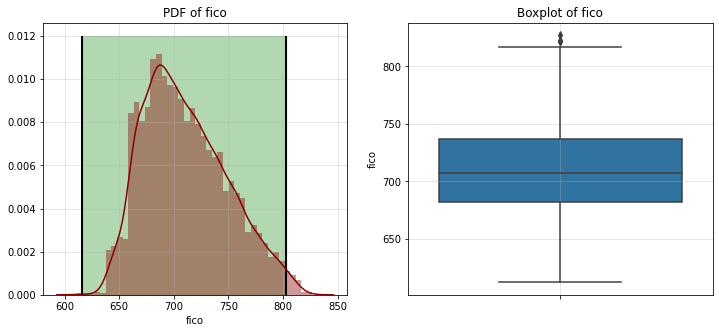

In [34]:
# Outliers described by IQR:
outliers_iqr(orig_data_copy_new, 'fico', 0.012)

Proportion of Outlier Data:  0.01044059302568386 %


([1613], 596.9406494696344, 824.7519794716894)

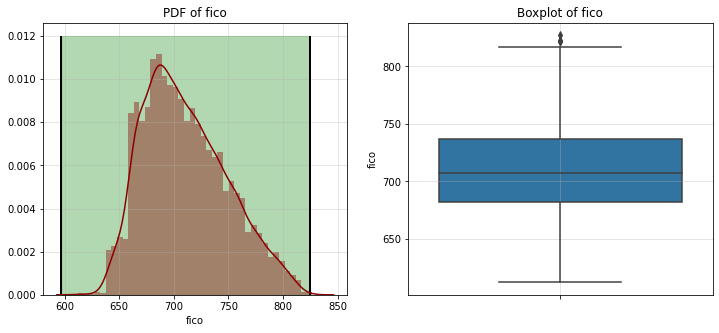

In [35]:
# Outliers described by zscore:
outliers_zscore(orig_data_copy_new, 'fico', 0.012)

<li>Insight: <strong>There exists a single outlier only and hence there is no point of dealing with that single data point <code>dti</code> as can be viewed from zscore figure and index of outliers as mentioned in list.</strong></li>

<h3>Outliers of <code>revol.util</code>:</h3>

Numerical Inspection of revol.util:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail               100.00
1  Percentage of Outliers Towards Right Tail               100.00
2                            Upper Threshold               -35.36
3                            Lower Threshold               128.86

 Graphical Interpretation of  revol.util:



True

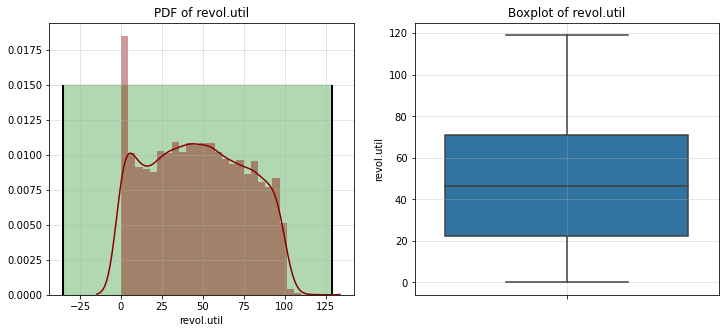

In [36]:
# Outliers described by IQR:
outliers_iqr(orig_data_copy_new, 'revol.util', 0.0150)

Proportion of Outlier Data:  0.0 %


([], -40.23947111393231, 133.83794261111336)

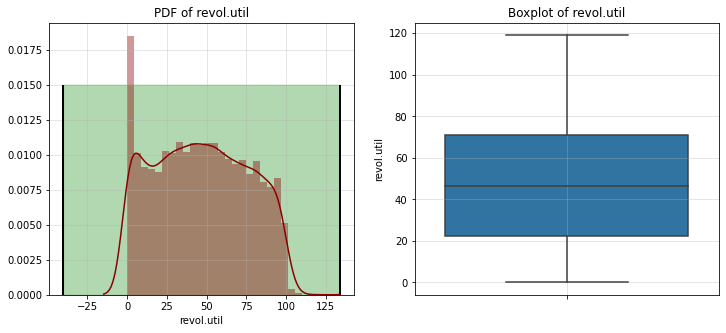

In [37]:
# Outliers described by zscore:
outliers_zscore(orig_data_copy_new, 'revol.util', 0.0150)

<li>Insight: <strong>There does not exist even a single outlier in <code>revol.util</code> as can be viewed from zscore figure and index of outliers as mentioned in list.</strong></li>

In [38]:
# The dataset with which we would be using:
orig_data_copy_new.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,log.installment,log.int.rate,z_scorelog.revol.bal,z_scorelog.days.with.cr.line,z_scorelog.installment,z_scorelog.int.rate,z_scorelog.annual.inc,z_scoredti,z_scorefico,z_scorerevol.util
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,6.721546,0.112346,0.762598,0.615406,1.624552,-0.127784,0.680388,0.998505,0.688825,0.182704
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,5.434682,0.101744,0.832981,-0.567258,-0.138685,-0.571733,0.244031,0.244540,-0.101303,1.030602
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,5.907702,0.127249,-0.206522,0.317193,0.509438,0.496266,-0.908659,-0.141885,-0.759742,-0.730683
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,5.095834,0.096037,0.833583,-0.603652,-0.602969,-0.810698,0.680388,-0.654697,0.030385,0.909966
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,4.643621,0.133306,-0.068449,0.073870,-1.222582,0.749902,0.597961,0.343326,-1.154806,-0.251586


In [39]:
# implementing changes in the orig_copy_data since all of the data is updated in orig_data_copy_new:
for feat in list(orig_data_copy.columns):
    orig_data_copy[feat] = orig_data_copy_new[feat]
    
orig_data_copy.head()  

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,log.days.with.cr.line,log.revol.bal,log.installment,log.int.rate
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,8.637809,10.270039,6.721546,0.112346
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,7.923348,10.422995,5.434682,0.101744
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,8.457655,8.163941,5.907702,0.127249
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,7.901362,10.424303,5.095834,0.096037
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,8.310661,8.464003,4.643621,0.133306


In [40]:
log_feats

['days.with.cr.line', 'revol.bal', 'installment', 'int.rate']

<h2>Feature Engineering:</h2>
<p>Since there are so many numercial features in our original data, hence we can move ahead with creating more features and then later on observe if the newly introduced features prove to be good predictors of the target feature i.e. <code>not.full.paid</code></p>

<h3>1) <code>loan.info</code>:</h3>
<p>This feature would take into consideration the monthly installment of the current loan the customer has taken along with his annual income. Thus, a lower value <strong> <code>log.installment</code> and high value of <code>log.annual.inc</code> would be a great thing for an investor to lend money. Since, if the person is earning high and the installments are less then there are more chances that a person would be able to repay the loan easily. It also takes into account the interest rate at which the loan was sanctioned. Ideally, we want the value to be as low as possible for <code>log.loan.info</code>.</p>

In [41]:
# log.loan.info:
orig_data_copy['loan.info'] = (np.exp(orig_data_copy['log.installment'])*np.exp(orig_data_copy['log.int.rate']))/np.exp(orig_data_copy['log.annual.inc'])

<h3>2) <code>credit.value</code>:</h3>
<p>This feature would take into consideration for how long the customer has taken this credit line loan along with for what number of days he has delayed his repayment of loan beyond 30 days along with the balance which is yet to be paid by the customer in his revolving account.</p>

In [42]:
# credit.value:
orig_data_copy['credit.value'] = np.exp(orig_data_copy['log.days.with.cr.line'])/(orig_data_copy['delinq.2yrs']+1)

<h3>3) <code>poss.getting.loan</code>:</h3>
<p>This feature defines the possibility of getting loan approved by the lenders/investors. This feature considers the number of times the investor has queried for a customer's information along with the dti value of the customer. If 'dti' is less and 'inq.last.6mths' is more, then the possibility of getting loan for a particular customer increases.</p>

In [43]:
orig_data_copy['poss.getting.loan'] =orig_data_copy['inq.last.6mths']/(orig_data_copy['dti']+1)

<h3>4) <code>fico.to.delinq.2yrs</code>:</h3>

In [44]:
orig_data_copy['fico.to.delinq.2yrs'] = (orig_data_copy['fico']*np.exp(orig_data_copy['log.annual.inc']))/(orig_data_copy['delinq.2yrs']+1)

<h3>5) <code>revol.bal.to.annual.income</code>:</h3>
<p>Revolving Balance is the balance which is left for the customer to pay after for which he has taken loan some time ago and has not paid until the due date. The aim of keeping 'revolving balance' in the numerator is that -> it could be 0 for some of the customers and hence the value would be infinity (if kept as a denominator). Thus, a customer who has low revolving balance and high annual income must be given the loan by the investors.</p>

In [45]:
orig_data_copy['revol.bal.to.annual.income'] = orig_data_copy['revol.bal']/np.exp(orig_data_copy['log.annual.inc'])

<h3>6) <code>fico.to.dti</code>:</h3>

In [46]:
orig_data_copy['fico.to.dti'] = (orig_data_copy['fico']*(orig_data_copy['pub.rec'] + 1))/(orig_data_copy['dti']+1)

<li>All of the above features which have been added would be tested in the next section using various Statistical Tests of whether they would be helpful in predicting the target feature.</li>

<h3>7) <code>savings</code>:</h3>

In [47]:
orig_data_copy['savings'] = (np.exp(orig_data_copy['log.annual.inc'])/12) - orig_data_copy['installment']

In [48]:
# adding new numerical features to the list of num features:
new_features_added = ['loan.info', 'credit.value', 'poss.getting.loan', 'fico.to.delinq.2yrs', 'revol.bal.to.annual.income', 'fico.to.dti', 'savings']
num_feats_orig.extend(new_features_added)

In [49]:
num_feats_orig

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'loan.info',
 'credit.value',
 'poss.getting.loan',
 'fico.to.delinq.2yrs',
 'revol.bal.to.annual.income',
 'fico.to.dti',
 'savings']

<h3>Distribution of Newly added Numerical Features:</h3>

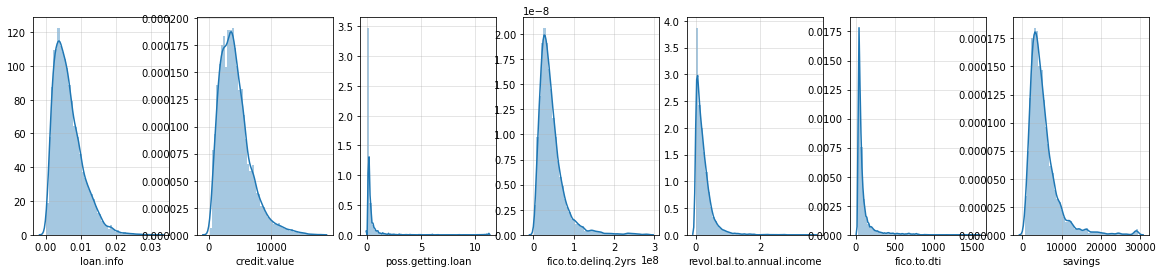

In [50]:
# original newly added feats:
plt.figure(figsize=(20, 4))
k = 1
for new_feat in new_features_added:
    plt.subplot(1, 7, k)
    sns.distplot(orig_data_copy[new_feat])
    plt.grid(True, alpha=0.4)
    k +=1

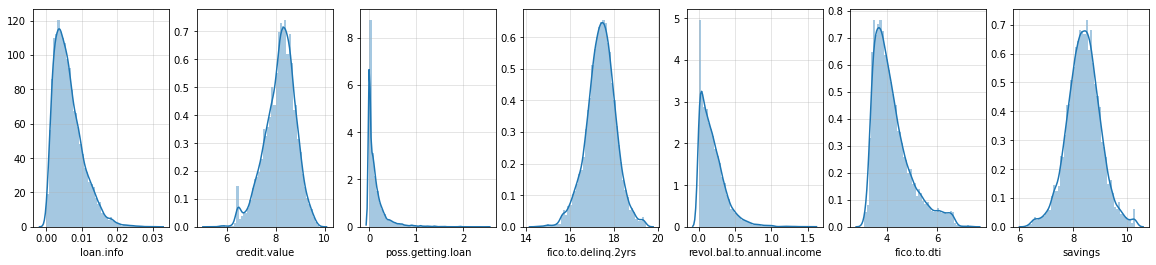

In [51]:
# logarithm of newly added feats:
plt.figure(figsize=(20, 4))
k = 1
for new_feat in new_features_added:
    plt.subplot(1, 7, k)
    sns.distplot(np.log(orig_data_copy[new_feat]+1))
    plt.grid(True, alpha=0.4)
    k +=1

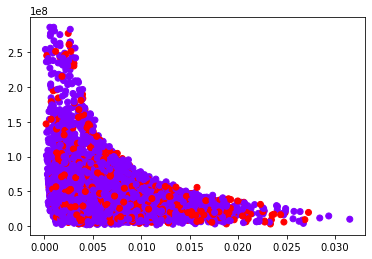

In [52]:
plt.scatter(orig_data_copy['loan.info'], orig_data_copy['fico.to.delinq.2yrs'], c=orig_data_copy['not.fully.paid'], cmap='rainbow')

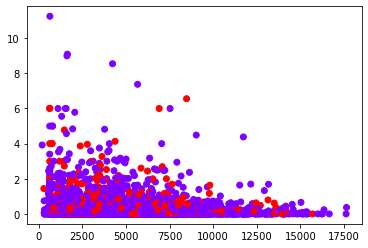

In [53]:
plt.scatter(orig_data_copy['credit.value'], orig_data_copy['poss.getting.loan'], c=orig_data_copy['not.fully.paid'], cmap='rainbow')

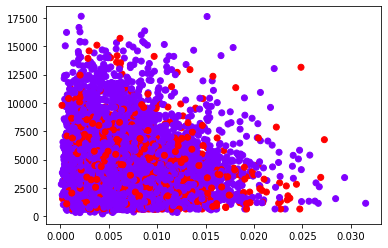

In [54]:
plt.scatter(orig_data_copy['loan.info'], orig_data_copy['credit.value'], c=orig_data_copy['not.fully.paid'], cmap='rainbow')

<h3>Creating 2 features for Visualization:</h3>

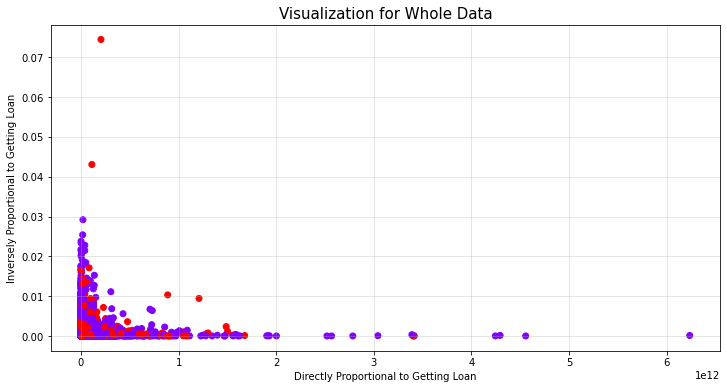

In [55]:
feat_1 = orig_data_copy['credit.value']*orig_data_copy['poss.getting.loan']*orig_data_copy['fico.to.delinq.2yrs']*(orig_data_copy['pub.rec']+1)
feat_2 = orig_data_copy['loan.info']*orig_data_copy['revol.bal.to.annual.income']

# plotting scatter_plot
plt.figure(figsize=(12, 6))
plt.scatter(feat_1, feat_2, c=orig_data_copy['not.fully.paid'], cmap='rainbow')
plt.xlabel('Directly Proportional to Getting Loan')
plt.ylabel('Inversely Proportional to Getting Loan')
plt.title('Visualization for Whole Data', fontsize=15)
plt.grid(True, alpha=0.4)

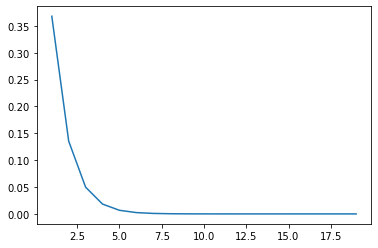

In [56]:
plt.plot(np.arange(1, 20), np.exp(np.arange(-1, -20, -1)))

<h2>Exploratory Data Analysis:</h2>

In [57]:
# adding the log of feats:
log_of_feats = ['log.'+feat for feat in log_feats]
num_feats_orig.extend(log_of_feats)

# removing these feats since their logarithm has been taken:
for log_feat in log_feats:
    num_feats_orig.remove(log_feat)
    
print('Numerical Features: ', num_feats_orig)

Numerical Features:  ['log.annual.inc', 'dti', 'fico', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'loan.info', 'credit.value', 'poss.getting.loan', 'fico.to.delinq.2yrs', 'revol.bal.to.annual.income', 'fico.to.dti', 'savings', 'log.days.with.cr.line', 'log.revol.bal', 'log.installment', 'log.int.rate']


In [58]:
# number of numerical features:
len(num_feats_orig)

18

In [59]:
# plotting Boxplot to observe the numerical feats which explain the variance of Target Feature:
orig_data_copy['fully.paid'] = np.where(orig_data_copy['not.fully.paid']==0, 1, 0)

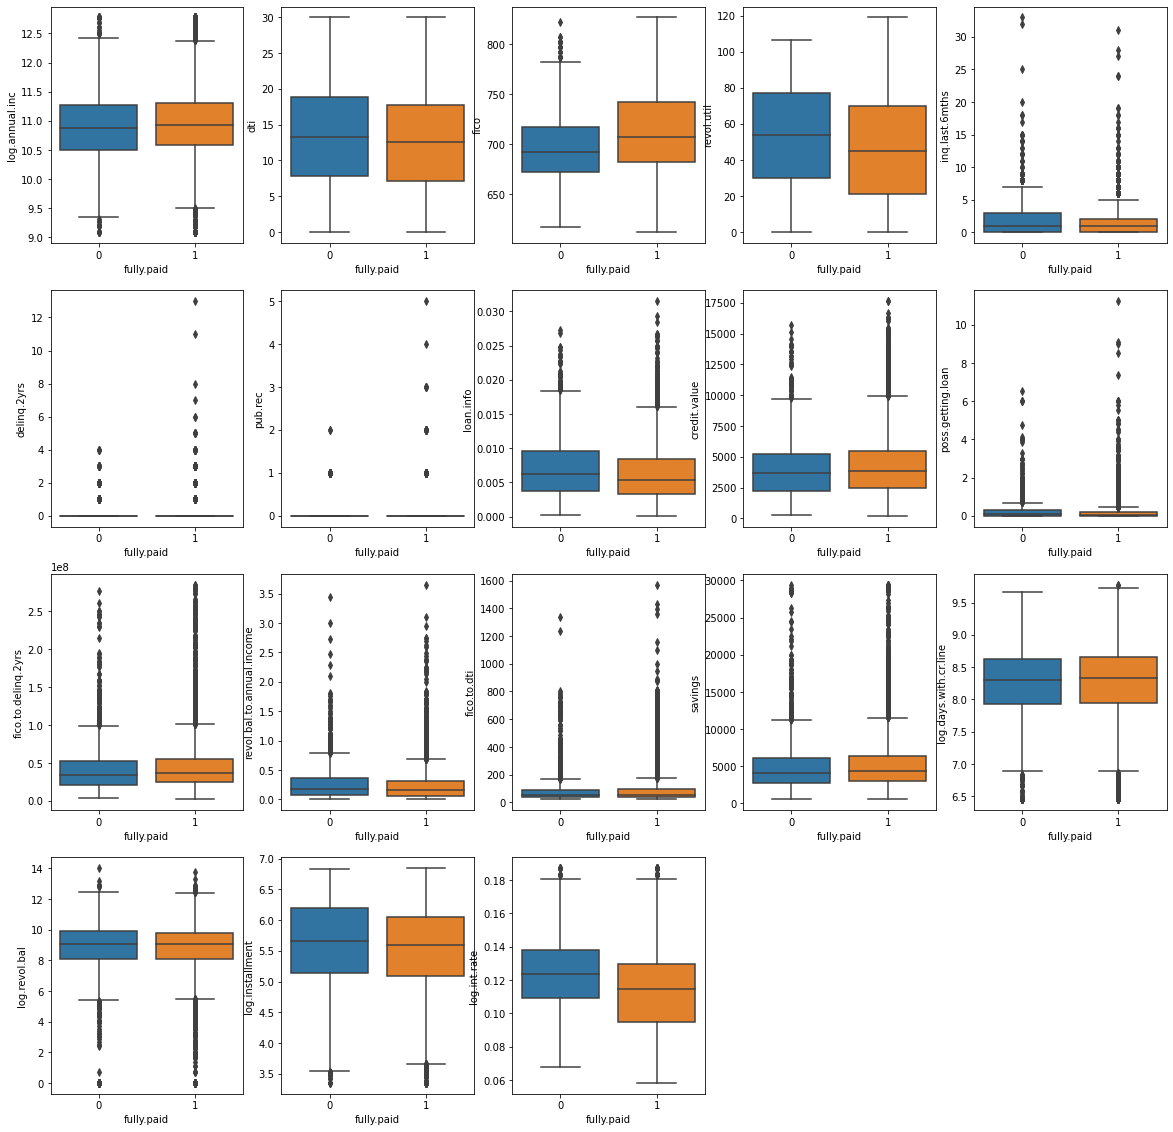

In [60]:
plt.figure(figsize=(20, 20))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(4, 5, k)
    sns.boxplot(x='fully.paid',y=num_feat, data=orig_data_copy)
    k +=1

<h3>ANOVA: Determining Significant Numerical Predictors for Target Feature:</h3>

In [61]:
# ANOVA:
from scipy.stats import f_oneway
def one_way_anova(data, num_feats=num_feats_orig, categorical_feat='fully.paid'):
    categories = list(data[categorical_feat].unique())
    anova_result = []
    
    for cur_num_feat in num_feats:
        list_data_categories = [data[data[categorical_feat]==category][cur_num_feat] for category in categories]
        p_value = f_oneway(*list_data_categories)[1]
        
        # significant feature only:
        if p_value<0.05:
            anova_result.append((cur_num_feat, p_value))
        
    print('ANOVA Test for '+ categorical_feat)
    result_df = pd.DataFrame(anova_result, columns=['Significant Features', 'P-Values'])
    return result_df

In [62]:
# numerical features which explain the variance of the target feature significantly:  
anova_table = one_way_anova(orig_data_copy)
anova_table

ANOVA Test for fully.paid


,Significant Features,P-Values
0,log.annual.inc,1.082974e-03
1,dti,2.549164e-04
2,fico,4.227100e-49
3,revol.util,8.537810e-16
4,inq.last.6mths,5.794797e-49
5,pub.rec,1.917766e-06
6,loan.info,1.022739e-14
7,credit.value,2.258610e-03
8,poss.getting.loan,8.268291e-12
9,fico.to.delinq.2yrs,3.775223e-02


In [63]:
# storing the significant feats in num_feats_anova:
num_feats_anova = list(anova_table['Significant Features'])
num_feats_anova

['log.annual.inc',
 'dti',
 'fico',
 'revol.util',
 'inq.last.6mths',
 'pub.rec',
 'loan.info',
 'credit.value',
 'poss.getting.loan',
 'fico.to.delinq.2yrs',
 'revol.bal.to.annual.income',
 'log.days.with.cr.line',
 'log.installment',
 'log.int.rate']

In [64]:
# pairplot to see how each significant numerical feature is affected by target feature:
# sns.pairplot(data=orig_data_copy, hue='fully.paid', vars=num_feats_anova)

<h3>Observation from pairplot:</h3>
<p>
<ol>
    <li><strong>Target Feature seems to be highly symmetric and we cannot separate them linearly, hence we might need to use SVM since it finds the mapping function using Mercer's Theorem and converts the features to the space where they can simply be classfied linearly.</strong></li>
    <li>Even the distribution of all these significant numerical features for both the target class is the same.</li>
    <li><code>log.annual.inc</code> has negative exponential relationship with <code>loan.info</code>.</li>
    <li><code>log.annual.inc</code> has squared relationship with <code>fico.to.delinq.2yrs</code>.</li>
    <li><code>poss.getting.loan</code> has negative exponential relationship with <code>dti</code>.</li>
    <li><code>log.int.rate</code> is inversely proportional to <code>fico</code>.</li>
    <li><code>inq.last.6mths</code> seems to be a reallly important feature since the classes seems to be distinguishable if we observe the relationship of this feature with other features.</li>
    <li><code>fico.delinq.2.yrs</code> has sharp negaive exponential relationship with <code>loan.info</code>.</li>
    <li><code>loan.info</code> has positive exponential relationship with <code>log.installment</code>.</li>
    <li><code>credit.value</code> has quadratic (squared) relationship with <code>log.days.with.cr.line</code>.</li>
    </ol>
</p>

<h3>Pearson's Correlation:</h3>

In [65]:
# highly correlated independent features with thresholded correlation>0.6:
correlation_table = orig_data_copy[num_feats_anova].corr()
highly_correlated_feats = []
all_feats = list(correlation_table.columns)
for idx_row in range(len(correlation_table)):
    for idx_column in range(len(correlation_table)):
        if (idx_row != idx_column):
            corr_value = correlation_table.iloc[idx_row, idx_column] 
            if (corr_value > 0.6):
                info_to_add = (all_feats[idx_row], all_feats[idx_column], corr_value)
                highly_correlated_feats.append(info_to_add)
            else:
                continue
        else:
            continue

# Creating a table for features whose correlation is relly high:
corr_feats_table = pd.DataFrame(highly_correlated_feats, columns=['Feature-1', 'Feature-2', 'Correlation'])
corr_feats_table

,Feature-1,Feature-2,Correlation
0,log.annual.inc,fico.to.delinq.2yrs,0.836255
1,credit.value,log.days.with.cr.line,0.841143
2,fico.to.delinq.2yrs,log.annual.inc,0.836255
3,log.days.with.cr.line,credit.value,0.841143


In [66]:
# to drop feats from num_feats_anova:
to_drop_feats = ['fico.to.delinq.2yrs', 'credit.value']
for feat in to_drop_feats:
    num_feats_anova.remove(feat)
num_feats_anova

['log.annual.inc',
 'dti',
 'fico',
 'revol.util',
 'inq.last.6mths',
 'pub.rec',
 'loan.info',
 'poss.getting.loan',
 'revol.bal.to.annual.income',
 'log.days.with.cr.line',
 'log.installment',
 'log.int.rate']

<h3>Determining Significant Categorical Features using Chi-Square Test of Independence:</h3>

In [67]:
from scipy.stats import chi2_contingency
# creating the contingency table:
def contingency_table(data, cat_feat, target_feat='fully.paid'):
    category_prob = []
    for category in data[cat_feat].unique():
        data_category = data[data[cat_feat]==category]
        target_category_prob = []
        for target_cat in data[target_feat].unique():
            target_data_category = data_category[data_category[target_feat]==target_cat]
            target_category_prob.append((len(target_data_category)))
        category_prob.append(target_category_prob)

    analysis_values = np.array(category_prob)
    target_cols = data[target_feat].unique()
    feat_cols = data[cat_feat].unique()
    table = pd.DataFrame(analysis_values, columns=[target_cols], index=[feat_cols])
    return table


# performing the chi-square test of independence to compute the significant categorical features for the target feature:
def chi2_test_of_indep(data, all_cat_feats, target_feat='fully.paid'):
    results_ = []
#     num_categories = data[target_feat].nunique()
    print('Chi-square Test of Independence is computed for --> ', target_feat)
    for categorical_feat in all_cat_feats:
        cont_table = contingency_table(data, categorical_feat)
        p_value = chi2_contingency(cont_table)[1] # chi-square test of independence

        # significant features dependence:
        if p_value<=0.05:
            results_.append((categorical_feat, p_value))
    
        
    test_of_indep_df = pd.DataFrame(results_, columns=['Significant Features', 'P-Values'])
    return test_of_indep_df

In [68]:
# removing 'not.fully.paid' from cat_feats_orig:
cat_feats_orig.remove('not.fully.paid')
cat_feats_orig

['credit.policy', 'purpose']

In [69]:
# applying chi2 test of independence on data:
chi2_table = chi2_test_of_indep(orig_data_copy, cat_feats_orig)
chi2_table

Chi-square Test of Independence is computed for -->  fully.paid


,Significant Features,P-Values
0,credit.policy,8.875731e-54
1,purpose,1.067245e-18


<li>Insight: <strong>Both of the categorical features seem to be very important predcitors of the target feature.</li>

In [70]:
# Significant Features of Chi-Square:
cat_feats_chi2 = list(chi2_table['Significant Features'])
cat_feats_chi2

['credit.policy', 'purpose']

<h3>Relationship between Significant Categorical Features and Target Feature:</h3>

Text(0.5, 1.0, 'Credit Policy of Customers')

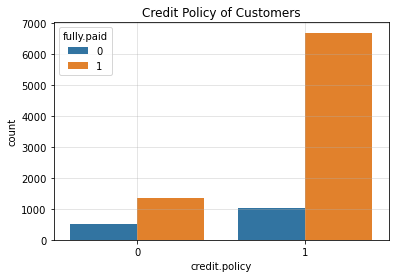

In [71]:
# countplot of 'credit.policy' wrt target feature:
sns.countplot(x='credit.policy', hue='fully.paid', data=orig_data_copy)
plt.grid(True, alpha=0.4)
plt.title('Credit Policy of Customers')

<li>Insight: <strong>It can be easily observed that most of the customers who were found to successfully pay the loan have <code>credit.value == 1.</code></li>

Text(0.5, 1.0, 'Purpose of Taking Loan')

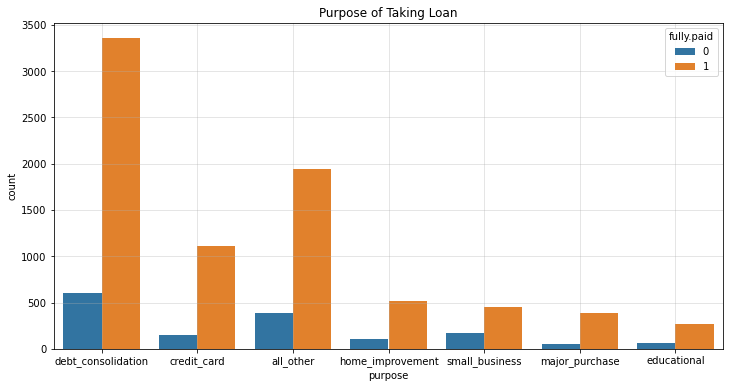

In [72]:
# countplot of 'purpose' wrt target feature:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='fully.paid', data=orig_data_copy)
plt.grid(True, alpha=0.4)
plt.title('Purpose of Taking Loan')

<li>Insight: <strong>It can again be clearly understood that most of the customers who have repaid the successfully had taken loan for <code>Loan Consolidation</code>.</li>

<h3>Finding the Range of Numerical Features on which the model was Trained.(Explicitely used by the Bank-Managers while making real-time predictions.)</h3>

In [81]:
orig_data_copy['annual.inc'] = np.exp(orig_data_copy['log.annual.inc'])

In [85]:
# features for which max and minimum values are to be computed on which model is trained:
feats_range_for = ['installment', 'fico', 'revol.util', 'annual.inc', 'int.rate', 'dti', 'inq.last.6mths', 'days.with.cr.line', 'delinq.2yrs', 'revol.bal']
for feat in feats_range_for:
    if feat not in orig_data_copy.columns:
        print(feat)
    else:
        print('*')

*
*
*
*
*
*
*
*
*
*


In [87]:
for feat in feats_range_for:
    print("Range of {} --> {} to {}".format(feat, min(orig_data_copy[feat]), max(orig_data_copy[feat])))

Range of installment --> 15.67 to 940.14
Range of fico --> 612 to 827
Range of revol.util --> 0.0 to 119.0
Range of annual.inc --> 8846.482234853493 to 353790.1091275145
Range of int.rate --> 0.06 to 0.2164
Range of dti --> 0.0 to 29.96
Range of inq.last.6mths --> 0 to 33
Range of days.with.cr.line --> 178.95833330000002 to 17639.95833
Range of delinq.2yrs --> 0 to 13
Range of revol.bal --> 0 to 1207359


<h3>Encoding Data for Feature Selection:</h3>

In [72]:
# function for encoding data:
def encoding_data(full_data, target_feature='fully.paid'):
    full_data_copy = full_data.copy()
    target_y = full_data_copy[target_feature]
    input_x = full_data_copy.drop([target_feature], axis=1)
    
    # iterating over each 
    for each_feat in list(input_x.columns):
        if full_data[each_feat].nunique() >= 10:
            # a numerical feature: Perform min-max scaling: 
            min_val = min(input_x[each_feat])
            max_val = max(input_x[each_feat])
            range_val = max_val - min_val
            input_x[each_feat] = (input_x[each_feat]-min_val)/range_val 
            
            # printing the max, min and range for each numerical feature for processing data in 
            # real-time while making predictions:
            print(each_feat)
            print('Minimum Value --> ', min_val)
            print('Maximum Value --> ', max_val)
            print('Range --> ', range_val)
            print('============================== \n\n')
            
        else:
            # a categorical feature:
            if input_x[each_feat].nunique()>2:
#                 print(each_feat)
                # for multinomial categorical feature
                for category in input_x[each_feat].unique(): # iterate over each category of the multi. categorical feature:
                    input_x[each_feat + '_' + str(category)] = np.where(input_x[each_feat]==category, 1, 0)
                
                # removing the categorical feature once encoded:
                input_x = input_x.drop([each_feat], axis=1)
            else:
                continue

    return input_x, target_y

In [73]:
# appending the target feature to the list of categorical features:
cat_feats_orig.append('fully.paid')
cat_feats_orig

['credit.policy', 'purpose', 'fully.paid']

In [74]:
# final features over which the feature selection procedure would work:
final_feats = num_feats_orig + cat_feats_orig
final_feats

['log.annual.inc',
 'dti',
 'fico',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'loan.info',
 'credit.value',
 'poss.getting.loan',
 'fico.to.delinq.2yrs',
 'revol.bal.to.annual.income',
 'fico.to.dti',
 'savings',
 'log.days.with.cr.line',
 'log.revol.bal',
 'log.installment',
 'log.int.rate',
 'credit.policy',
 'purpose',
 'fully.paid']

In [75]:
# getting the encoded data:
x_encoded, y_target = encoding_data(orig_data_copy[final_feats])
x_encoded.head()

log.annual.inc
Minimum Value -->  9.087775171395668
Maximum Value -->  12.776459104204873
Range -->  3.688683932809205


dti
Minimum Value -->  0.0
Maximum Value -->  29.96
Range -->  29.96


fico
Minimum Value -->  612
Maximum Value -->  827
Range -->  215


revol.util
Minimum Value -->  0.0
Maximum Value -->  119.0
Range -->  119.0


inq.last.6mths
Minimum Value -->  0
Maximum Value -->  33
Range -->  33


delinq.2yrs
Minimum Value -->  0
Maximum Value -->  13
Range -->  13


loan.info
Minimum Value -->  0.00010093705583818076
Maximum Value -->  0.031520840402658665
Range -->  0.03141990334682048


credit.value
Minimum Value -->  203.3571428571428
Maximum Value -->  17640.958330000016
Range -->  17437.601187142875


poss.getting.loan
Minimum Value -->  0.0
Maximum Value -->  11.25
Range -->  11.25


fico.to.delinq.2yrs
Minimum Value -->  1906560.0008310862
Maximum Value -->  285508618.0659042
Range -->  283602058.06507313


revol.bal.to.annual.income
Minimum Value -->  0.0
Maximum Va

,log.annual.inc,dti,fico,revol.util,inq.last.6mths,delinq.2yrs,loan.info,credit.value,poss.getting.loan,fico.to.delinq.2yrs,...,pub.rec_3,pub.rec_4,pub.rec_5,purpose_debt_consolidation,purpose_credit_card,purpose_all_other,purpose_home_improvement,purpose_small_business,purpose_major_purchase,purpose_educational
0,0.613398,0.650200,0.581395,0.437815,0.000000,0.000000,0.344562,0.311832,0.000000,0.214168,...,0,0,0,1,0,0,0,0,0,0
1,0.540672,0.476969,0.441860,0.644538,0.000000,0.000000,0.121045,0.146674,0.000000,0.155318,...,0,0,0,0,1,0,0,0,0,0
2,0.348557,0.388184,0.325581,0.215126,0.030303,0.000000,0.412307,0.258501,0.007038,0.070230,...,0,0,0,1,0,0,0,0,0,0
3,0.613398,0.270360,0.465116,0.615126,0.030303,0.000000,0.064113,0.143231,0.009768,0.206675,...,0,0,0,1,0,0,0,0,0,0
4,0.599660,0.499666,0.255814,0.331933,0.000000,0.076923,0.043559,0.104954,0.000000,0.088294,...,0,0,0,0,1,0,0,0,0,0


In [76]:
x_encoded['loan.info']

0       0.344562
1       0.121045
2       0.412307
3       0.064113
4       0.043559
          ...   
9573    0.061466
9574    0.131067
9575    0.083828
9576    0.257127
9577    0.393958
Name: loan.info, Length: 9578, dtype: float64

<h3>Other Feature Selection Techniques:</h3>

<h4>1) F-Classification:</h4>

In [77]:
from sklearn.feature_selection import f_classif

In [78]:
# Performing ANOVA on the whole input data:
inp_feats = list(x_encoded.columns)
f_val, p_val = f_classif(x_encoded, y_target)

['log.annual.inc',
 'dti',
 'fico',
 'revol.util',
 'inq.last.6mths',
 'loan.info',
 'credit.value',
 'poss.getting.loan',
 'fico.to.delinq.2yrs',
 'revol.bal.to.annual.income',
 'log.days.with.cr.line',
 'log.installment',
 'log.int.rate',
 'credit.policy',
 'pub.rec_0',
 'pub.rec_1',
 'purpose_credit_card',
 'purpose_small_business',
 'purpose_major_purchase',
 'purpose_educational']

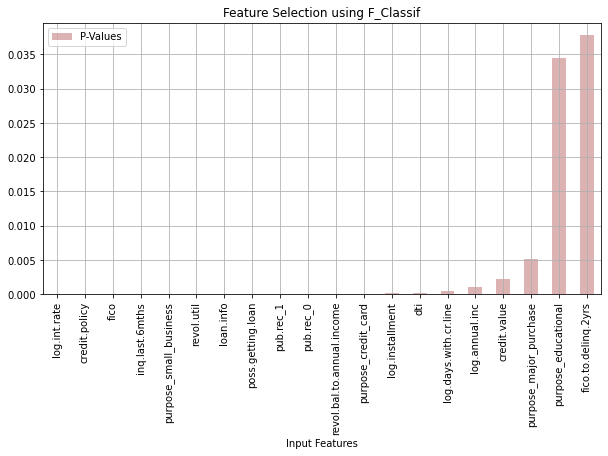

In [79]:
# plotting significant features's Barchart based upon their p-values
def plot_significant_features(feats_x, val_y, title, threshold=0.05):
    result = []
    for idx in range(len(feats_x)):
        if val_y[idx] < threshold:
            result.append((feats_x[idx], val_y[idx]))
        else:
            continue
    
    result_df = pd.DataFrame(result, columns=['Input Features', 'P-Values'])
    result_df.sort_values(by='P-Values').plot('Input Features', 'P-Values', kind='bar', 
                  figsize=(10, 5), grid=True, alpha=0.3, color='darkred', title=title)
    
    return list(result_df['Input Features'])
  
# Plotting significant features using F_classification:
f_classif_sig_feats = plot_significant_features(inp_feats, p_val, title='Feature Selection using F_Classif', threshold=0.05)
f_classif_sig_feats

<h4>2) Chi-Square Test of Independence From SKlearn:</h4>

In [80]:
from sklearn.feature_selection import chi2

['fico',
 'revol.util',
 'inq.last.6mths',
 'loan.info',
 'poss.getting.loan',
 'log.int.rate',
 'credit.policy',
 'pub.rec_1',
 'purpose_credit_card',
 'purpose_small_business',
 'purpose_major_purchase',
 'purpose_educational']

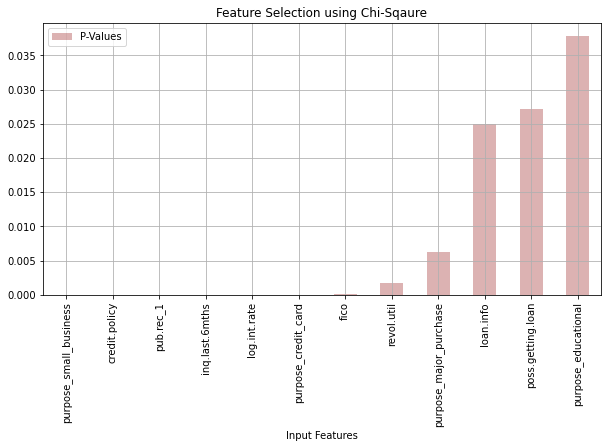

In [81]:
# performing chi-square test of independence:
chi2_val, p_val = chi2(x_encoded, y_target)
chi2_sig_feats = plot_significant_features(inp_feats, p_val, title='Feature Selection using Chi-Sqaure', threshold=0.05)
chi2_sig_feats

<h4>3) Feature Selection using Mutual Information:</h4>

In [82]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
# making a bit of changes in original plot_significant_features function:
def new_plot_significant_features(feats_x, val_y, title, threshold=0.05):
    result = []
    for idx in range(len(feats_x)):
        if val_y[idx] > threshold:
            result.append((feats_x[idx], val_y[idx]))
        else:
            continue
    
    result_df = pd.DataFrame(result, columns=['Input Features', 'P-Values'])
    result_df.sort_values(by='P-Values').plot('Input Features', 'P-Values', kind='bar', 
                  figsize=(10, 5), grid=True, alpha=0.3, color='darkred', title=title)
    
    return list(result_df['Input Features'])

['fico', 'inq.last.6mths', 'log.int.rate', 'credit.policy']

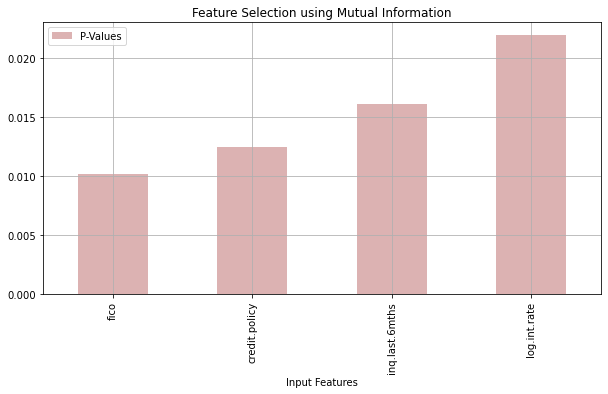

In [84]:
# applying mutual_information on data:
mi_val = mutual_info_classif(x_encoded, y_target)
mi_sig_feats = new_plot_significant_features(inp_feats, mi_val, title='Feature Selection using Mutual Information', threshold=0.009)
mi_sig_feats

<h4>4) Decision Trees Feature Importance:</h4>
<p>Hyperparameters to control:
<ol>
    <li><code>criterion</code> - Keep it default i.e. <code>gini</code></li>
    <li><code>max_depth</code> - Maximum Depth of the tree.</li>
    <li><code>min_samples_split</code> - Minimum number of samples required to split the internal node.</li>
    <li><code>min_samples_leaf</code> - Minimum number of samples required to be present at the leaf node.</li>
    <li><code>max_features</code> - Maximum number of features considered during the best feature for splitting the data.</li>
    <li><code>max_leaf_nodes</code> - Maximum number of leaf nodes to be present</li>
    <li><code>class_weight</code> - Keep it <code>'balanced'</code>.</li>
    <li><code>sklearn.tree.plot_tree(dec_clf)</code> - Used to plot the tree's logic about how the tree is constructed.</li>
     </ol>
</p>

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

def search_best_model(estimator, params, x_train, y_train, search='grid'):
    f1_scorer = make_scorer(f1_score) # making the roc_auc_score as the scoring function
    if search == 'random':
        rand_cv = RandomizedSearchCV(estimator, param_distributions=params, scoring=f1_scorer, cv=5, n_jobs=-1)
        rand_cv_search = rand_cv.fit(x_train, y_train)
        best_model_rand = rand_cv_search.best_estimator_
        return best_model_rand
    else:
        grid_cv = GridSearchCV(estimator, param_grid=params, scoring=f1_scorer, cv=5, n_jobs=-1)
        grid_cv_search = grid_cv.fit(x_train, y_train)
        best_model_grid = grid_cv_search.best_estimator_
        return best_model_grid

In [86]:
dec_tree_clf = DecisionTreeClassifier(class_weight='balanced')

# First Grid Search:
# params = {'max_depth': [80, 150, 200],
#          'min_samples_split': [10, 100, 200],
#          'min_samples_leaf': [10, 100, 200],
#          'max_features': [10,100, 200],
#          'max_leaf_nodes': [10, 100, 200]}

# Second Grid Search:
params = {'max_depth': [130],
         'min_samples_split': [140],
         'min_samples_leaf': [45, 50, 55],
         'max_features': [2, 5, 8],
         'max_leaf_nodes': [2, 5, 10]}

best_dec_tree = search_best_model(dec_tree_clf, params, x_encoded, y_target)
best_dec_tree

DecisionTreeClassifier(class_weight='balanced', max_depth=130, max_features=2,
                       max_leaf_nodes=2, min_samples_leaf=50,
                       min_samples_split=140)

In [87]:
# important features based upon which the data is splitted towards the beginning of   
dec_tree_feat_rank = best_dec_tree.feature_importances_
dec_tree_feat_rank

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

['inq.last.6mths']

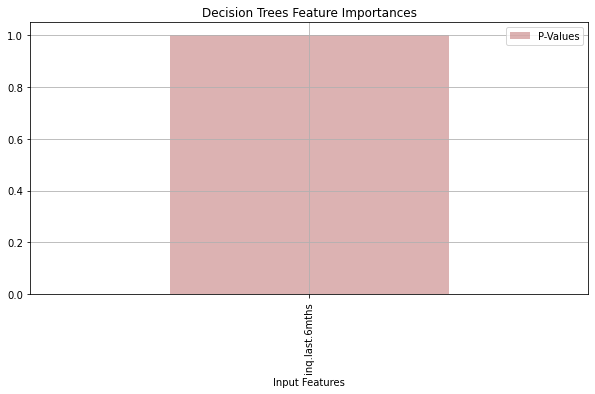

In [88]:
dec_tree_sig_feats = new_plot_significant_features(inp_feats, dec_tree_feat_rank, title='Decision Trees Feature Importances', threshold=0.000)
dec_tree_sig_feats

<h3>Considering all the Important Features:</h3>

In [89]:
# union of all of the above 
imp_feats = set(dec_tree_sig_feats).union(set(mi_sig_feats).union(set(f_classif_sig_feats).union(set(chi2_sig_feats))))
imp_feats

{'credit.policy',
 'credit.value',
 'dti',
 'fico',
 'fico.to.delinq.2yrs',
 'inq.last.6mths',
 'loan.info',
 'log.annual.inc',
 'log.days.with.cr.line',
 'log.installment',
 'log.int.rate',
 'poss.getting.loan',
 'pub.rec_0',
 'pub.rec_1',
 'purpose_credit_card',
 'purpose_educational',
 'purpose_major_purchase',
 'purpose_small_business',
 'revol.bal.to.annual.income',
 'revol.util'}

In [90]:
# number of features have been reduced from 31 to 20:
len(imp_feats)

20

In [91]:
# Saving the data in other file:
x_encoded_imp = x_encoded[imp_feats]
x_encoded_imp['target'] = y_target
# x_encoded_imp.to_csv('Final Data for Modelling.csv')

<h2>Multivariate Outliers Detection:</h2>

In [92]:
# function which computes the mahalanobis distance for each data point:
def mahalanobis_distance(data):
    
    # computing the mean of each feature and aligning the features in the right way:
    x = np.transpose(data.values) # to get all the feature's value in each vector.
    means = np.mean(x, axis=1).reshape(len(data.columns), 1) # compute mean of each of the feature and reshape it
    
    # computing the terms required:
    x_minus_mu = x-means
    inv_cov_mat = np.linalg.inv(np.cov(x))
    left_side = np.dot(np.transpose(x_minus_mu), inv_cov_mat)
    maha_dist_matrix = np.dot(left_side, x_minus_mu)
    return maha_dist_matrix.diagonal()

In [93]:
x = pd.DataFrame(x_encoded[imp_feats])
maha_distance = mahalanobis_distance(x)
len(maha_distance)

9578

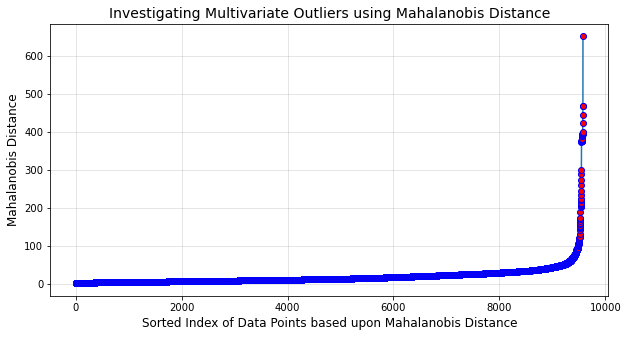

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(x_encoded)), sorted(maha_distance), '-o', mfc='red', mec='blue')
plt.xlabel('Sorted Index of Data Points based upon Mahalanobis Distance', fontsize=12)
plt.ylabel('Mahalanobis Distance', fontsize=12)
plt.title('Investigating Multivariate Outliers using Mahalanobis Distance', fontsize=14)
plt.grid(True, alpha=0.4)
plt.savefig('Mahalanobis Distance Plot of sorted data based upon the distance')

Text(0.5, 1.0, 'Mahalanobis Distance Distribution')

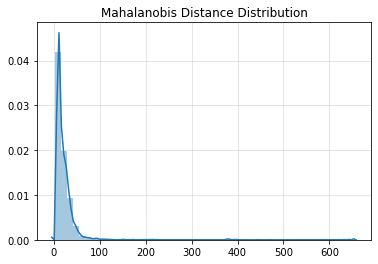

In [95]:
# distribution of mahalanobis distance:
sns.distplot(maha_distance)
plt.grid(True, alpha=0.4)
plt.title('Mahalanobis Distance Distribution', fontsize=12)

In [96]:
from scipy.stats import chi2

Text(0.5, 1.0, 'Chi-Squre Distribution')

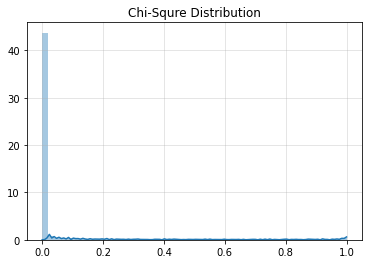

In [97]:
chi2_maha = 1-chi2.cdf(maha_distance**2, df=len(imp_feats))
sns.distplot(chi2_maha)
plt.grid(True, alpha=0.4)
plt.title('Chi-Squre Distribution', fontsize=12)

<h3>Observation:</h3>
<p>
<ol>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    </ol>
</p>